In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [25]:
df = pd.read_csv("Student_Performance.csv")
with pd.option_context("future.no_silent_downcasting", True): # df.replace is deprecated
    df = df.replace('Yes', 1).replace('No', 0)
df.isna().all()

Hours Studied                       False
Previous Scores                     False
Extracurricular Activities          False
Sleep Hours                         False
Sample Question Papers Practiced    False
Performance Index                   False
dtype: bool

## Табличное представление статистики по датасету:

In [26]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Графическое представление статистики по датасету:

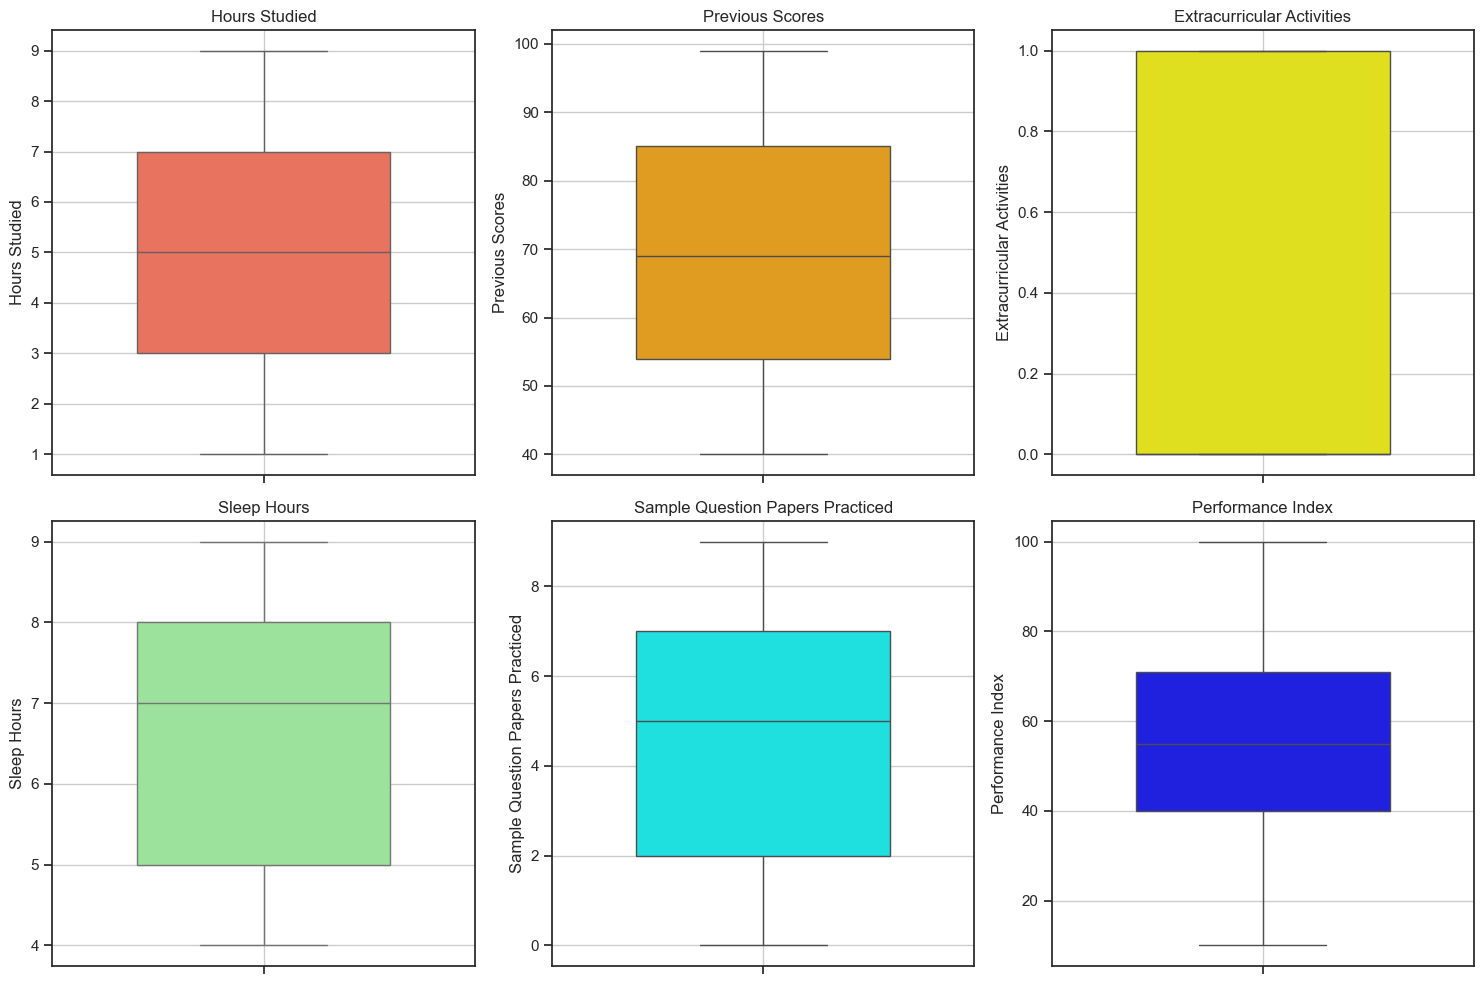

In [27]:
sns.set_theme(style="ticks")
plt.figure(figsize=(15, 10))

colors = ['tomato', 'orange', 'yellow', 'lightgreen', 'cyan', 'blue']
parameters = df.columns

for i, parameter in enumerate(parameters):
    plt.subplot(2, 3, i+1)  # Устанавливаем положение подграфиков
    sns.boxplot(y=df[parameter], color=colors[i], width=0.6)
    plt.title(parameter)
    plt.grid()

plt.tight_layout()
plt.show()

## Нормирование значений:

In [28]:
scaled_df = pd.DataFrame(preprocessing.normalize(df), columns=list(df.columns))
scaled_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.051868,0.733555,0.007410,0.066687,0.007410,0.674278
1,0.038165,0.782373,0.000000,0.038165,0.019082,0.620174
2,0.116150,0.740454,0.014519,0.101631,0.029037,0.653341
3,0.078519,0.816597,0.015704,0.078519,0.031408,0.565337
4,0.069587,0.745577,0.000000,0.079528,0.049705,0.656108
...,...,...,...,...,...,...
9995,0.018405,0.901857,0.018405,0.073621,0.036811,0.423321
9996,0.080301,0.734179,0.011472,0.091772,0.057358,0.665349
9997,0.053685,0.742642,0.008947,0.071580,0.044737,0.662115
9998,0.066053,0.711909,0.007339,0.051375,0.000000,0.697230


## Разделение данных:

In [29]:
# Устанавливаем случайное состояние для воспроизводимости
np.random.seed(42)

# Генерируем случайные индексы и перемешиваем их
shuffled_indices = np.random.permutation(scaled_df.index)

# Определяем размер тестовой выборки
test_size = int(0.3 * len(scaled_df))
test_indices = shuffled_indices[:test_size]
train_indices = shuffled_indices[test_size:]

# Делим данные на обучающую и тестовую выборки
X = scaled_df.drop("Performance Index", axis=1).values  # Все предикторы
y = scaled_df["Performance Index"].values  # Целевая переменная

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

## Реализация линейной регрессии с использованием метода наименьших квадратов

In [30]:
def calculate_coefficients(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Добавление столбца единиц
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(theta)

# R²
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

## Построение моделей

In [31]:
# Модель 1: Первый набор признаков
feature_indices_model1 = [0, 1]  # Индексы для 'Hours Studied' и 'Previous Scores'
X_train_model1 = X_train[:, feature_indices_model1]
X_test_model1 = X_test[:, feature_indices_model1]

theta_model1 = calculate_coefficients(X_train_model1, y_train)
y_pred_model1 = predict(X_test_model1, theta_model1)
r2_model1 = r_squared(y_test, y_pred_model1)

# Модель 2: Второй набор признаков
feature_indices_model2 = [0, 2, 3]  # Индексы для 'Hours Studied', 'Sleep Hours', 'Extracurricular Activities'
X_train_model2 = X_train[:, feature_indices_model2]
X_test_model2 = X_test[:, feature_indices_model2]

theta_model2 = calculate_coefficients(X_train_model2, y_train)
y_pred_model2 = predict(X_test_model2, theta_model2)
r2_model2 = r_squared(y_test, y_pred_model2)

# Модель 3: Третий набор признаков
feature_indices_model3 = [0, 1, 2, 4]  # Индексы для 'Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced'
X_train_model3 = X_train[:, feature_indices_model3]
X_test_model3 = X_test[:, feature_indices_model3]

theta_model3 = calculate_coefficients(X_train_model3, y_train)
y_pred_model3 = predict(X_test_model3, theta_model3)
r2_model3 = r_squared(y_test, y_pred_model3)


# Результаты
print(f"R² для модели 1: {r2_model1:.4f}")
print(f"R² для модели 2: {r2_model2:.4f}")
print(f"R² для модели 3: {r2_model3:.4f}")

R² для модели 1: 0.9666
R² для модели 2: 0.5341
R² для модели 3: 0.9730
